## MENGIMPORT BEBERAPA LIBRARY

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats

## MEMBACA DATA

In [2]:
# 1. Load dataset
data = pd.read_csv('insurance.csv')

## EDA

In [3]:
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


*MENAMPILKAN TYPE DATA*

In [4]:
print("\nData Types:")
print(data.dtypes)


Data Types:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


Pada tahap ini saya menampilkan type data dari setiap variabel, berdasarkan output terdapat variabel yang memiliki type data  selain integer yakni variabel sex, smoker dan region. Pada variabel ini harus di rubah menjadi int agar bisa dilakukan tahap selanjutnya

*MENAMPILKAN UKURAN DATA*

In [5]:
print("\nData Shape:", data.shape)


Data Shape: (1338, 7)


*MENAMPILKAN STATISTIK DESKRIPTIF*

In [6]:
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


Berdasarkan statistik deskiptif ini didapatkan bahwa : 
1. rata-rata variebal age yakni 39, berdasarkan data individu berusia 39 tahun. Usia termuda berada di usia 18 dan usia tertua pada usia 64. Standar deviasi yang dimiliki variabel age yakni 14.05 yang artinya variabel age memiliki variasi yang cukup tinggi

2. rata-rata variabel bmi yakni 30.66 hal ini menunjukkan individu masuk ke kategori overwight. Bmi terendah berada di nilai 15.96 yang termasuk ke golongan sangat kurus dan bmi tertinggi berada di nilai 53.13 yang masuk ke golongan obesitas parah. Standar deviasi yakni 6.09 data pada variabel cukup bervariasi namun lebih rendah dibandingkan dengan variabel age

3. rata-rata variabel children yakni 1. Nilai standar deviasi yakni 1.20 yang artinya variasi disini kecil,mayoritas memiliki sedikit anak.

4. rata-rata variabel charges yakni sebesar  13270.422265. Standar deviasi pada variabel charges yakni 12110.011237 artinya variabel charges memiliki variasi yang sangat besar, terdapat individu yang membayar sangat murah dan ada juga yang mahal. Biaya termurah yakni berada pada nilai 1121.873900 dan biaya termahal berada pada nilai 63770.428010


*MENAMPILKAN APAKAH ADA DATA YANG NULL ATAU TIDAK*

In [7]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Pada tahap ini saya menampilkan apakah ada data yang null atau missing value. Berdasarkan output yang dihasilkan tidak ada data yang null atau missing value

*MENAMPILKAN DATA YANG DUPLIKAT*

In [8]:
print("\nDuplicate Count:", data.duplicated().sum())


Duplicate Count: 1


Pada tahap ini saya menampilkan apakah terdapat data yang duplikat, berdasarkan output didapatkan bahwa ada satu data yang duplikat

*MENGHAPUS DATA YANG DUPLIKAT*

In [9]:
data.drop_duplicates(inplace=True)


Karena terdapat data yang duplikat disini saya menghapus data duplikat tersebut

*MENAMPILKAN HASIL PROSES PENGHAPUSAN DATA DUPLIKAT SEBELUMNYA*

In [10]:
print("\nDuplicate Count:", data.duplicated().sum())


Duplicate Count: 0


Setelah menghapus data duplikat di sini saya memastikan lagi apakah masih ada data yang duplikat atau tida. Dan hasilnya yakni sudah tidak ada data yang duplikat

*MENGELOMPOKKAN VARIABEL SESUAI DENGAN TYPE DATA*

In [11]:
numerical_features = ['age', 'bmi', 'charges']
categorical_features = ['sex', 'smoker', 'region']

Pada tahap ini dilakukan pengelompokkan variabel berdasarkan type data. Pada data insurace sendiri memiliki 8 variabel, dimana 4 variabel yakni age,bmi, dan charger memiliki type data numerik. Sedangkan 4 variabel lainya yakni sex, smoker dan resgion memiliki  type data caterogical. Proses ini dilakukan karena data yang memiliki tipe data kategori perlu di konversi menjadi tipe data numerik agar bisa di proses. Sedangkan untuk tipe data numerik bisa langsung digunakan dalam model regresi walaupun memerlukan normalisasi atau transformasi jika tidak berdistribusi normal atau memiliki data outlier

*MENAMPILKAN HISTORGRAM SETIAP VARIABEL TIPE DATA NUMERIK UNTUK MELIHAT DISTRIBUSINYA*

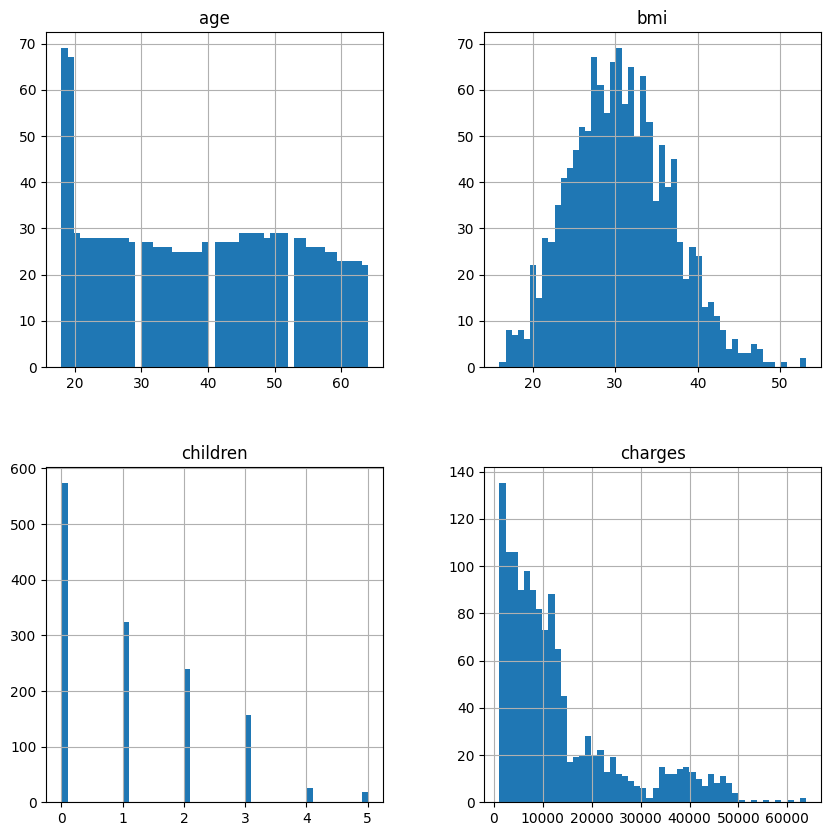

In [12]:
data.hist(bins=50, figsize=(10,10))
plt.show()

Berdasarkan hasil histogram di atas didaptkan bahwa : 
1. Pada histogram variabel Age data tersebar di usia 18-64. Data terbanyak berada sebelum 20 tahun sekitar usia 18 tahun. Data terdisribusi merata diatas usia 20 tahun

2. Pada  histogram variabel bmi tampak data berdistribusi normal. Nilai BMI terbanyak berada di rentang 25-35,nilai ini menunjukkan kondisi bmi normal hingga overweight.

3. Pada histogram variabel Children angka 0 memiliki data tertinggi yang menandakan bahwa mayoritas tidak memiliki anak dan sangat sedikit yang memiliki anak lebih dari 3

4. Pada histogram variabel charges distribusi skewed ke kanan. Sebagian besar berada di 15.000

*MENAMPILKAN BOXPLOT UNTUK SELURUH VARIABEL*

C:\Users\nimaa\AppData\Local\Temp\ipykernel_28152\807991481.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i], x=data[column], palette='Set3')
C:\Users\nimaa\AppData\Local\Temp\ipykernel_28152\807991481.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i], x=data[column], palette='Set3')
C:\Users\nimaa\AppData\Local\Temp\ipykernel_28152\807991481.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i], x=data[column], palette='Set3')


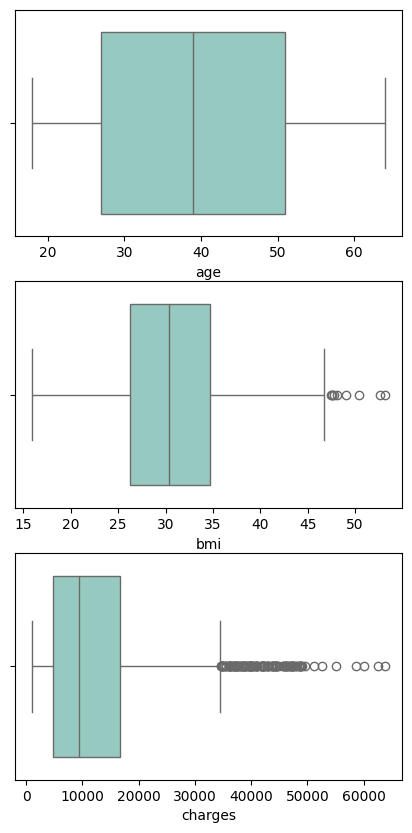

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5, 10))
for i, column in enumerate(numerical_features):
    sns.boxplot(ax=axes[i], x=data[column], palette='Set3')
    axes[i].set_xlabel(column)

plt.show()

Berdasarkan output yang dihasilkan dari boxplot didapatkan bahwa :
1. Pada boxplot variabel age memiliki median sekitar 40 tahun yang artinya setengah dari total data berusia di bawah 40 tahun. Pada data age ini tidak ditemukan outlier

2. Pada boxplot variabel bmi median sekitar 30 yang menunjukkkan kategori overweight. Pada data ini terdapat beberapa outlier di atas 45,yang artinya ada individu dengan bmi yang sangat tinggi

3. Pada boxplot variabel charger median sekitar 10.000 - 15.000. Pada data ini ditemukan data outlier yang cukup banyak yang artinya ada beberapa individu yang memiliki biaya asuransi yang tinggi

*MENAMPILKAN DISTRIBUSI VARIABEL SEX,SMOKER DAN REGION*

        jumlah sampel  persentase
sex                              
male              675        50.5
female            662        49.5


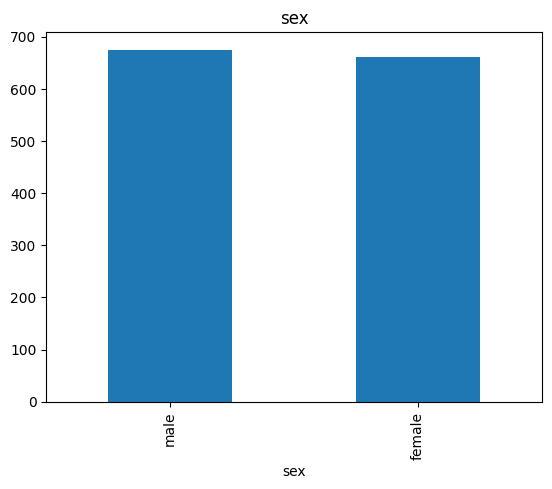

        jumlah sampel  persentase
smoker                           
no               1063        79.5
yes               274        20.5


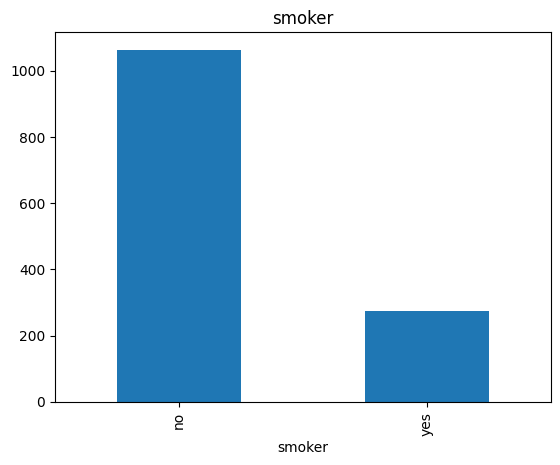

           jumlah sampel  persentase
region                              
southeast            364        27.2
southwest            325        24.3
northwest            324        24.2
northeast            324        24.2


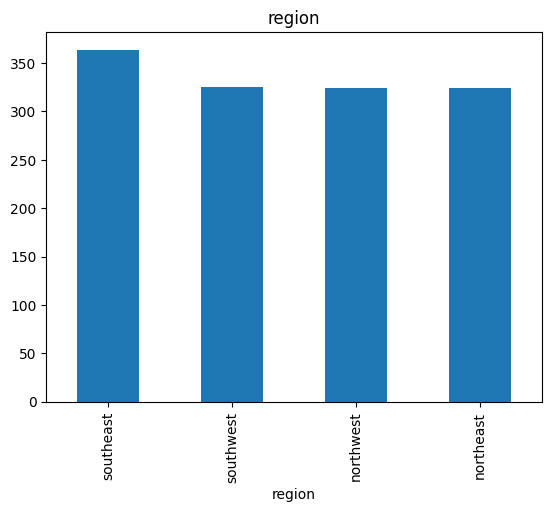

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_categorical(data, categorical_features):
    for feature in categorical_features[:3]:
        count = data[feature].value_counts()
        percent = 100*data[feature].value_counts(normalize=True)
        df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
        print(df)
        count.plot(kind='bar', title=feature)
        plt.show()
plot_categorical(data, categorical_features)

Pada diagram batang ini kita bisa melihat apakah data terjadi balance (seimbang) atau imbalance (tidak seimbang) dan didapatkan bahwa : 

1. Pada diagram batang variabel sex, jumlah laki-laki tidak berbeda jauh dengan jumlah perempuan sehingga data ini bisa dikaakan balance karena tidak ada perbedaan yang signifikan

2. Pada diagram batang smoker, jumlah individu yang merokok sangat banyak di bandingkan dengan jumlah individu yang tidak merokok, pada variabel smoker ini data imbalance karena memiliki perbedaan yang signifikan

3. Pada diagram batang region jumlah individu yang berada di southeast, southwest, northwest, dan northeast memiliki jumlah yang tidak berbeda jauh dapat disimpulan data pada region ini balance karena tidak memiliki perbedaan yang signifikan

*MENAMPILKAN MATRIKS KORELASI ANTAR VARIABEL*

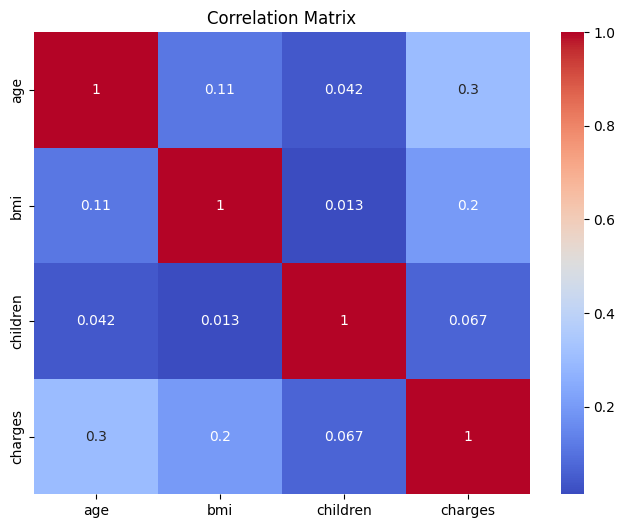

In [15]:
numeric_cols = ['age', 'bmi', 'children', 'charges']
correlation = data[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Dari beberapa variabel, variabel yang memiliki korelasi tinggi dengan variabel charger ada 2 variabel yakni variabel age dan variabel smoker dengan nilai 0.3 dan 0.2

*MENANGANI DATA OUTLIER*

In [16]:

def handle_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean[col] = np.where(
            (df_clean[col] < lower_bound) | (df_clean[col] > upper_bound),
            np.nan,
            df_clean[col]
        )
    return df_clean

data = handle_outliers(data, ['bmi', 'charges'])
data.dropna(inplace=True)

Pada tahap ini dilakukan handling outlier  sebelum data dimodelkan. Untuk handling outlier ini digunakan metode IQR. IQR adalah rentang antara kuartil 1 dan kuartil 3 dengan rumus yakni sebagai berikut : 

lower_bound = Q1 - 1.5 * IQR (batas bawah)
upper_bound = Q3 + 1.5 * IQR (batas atas)

Jika nilai lebih kecil dari batas bawah atau lebih besar dari batas atas maka akan dianggap outlier kemudian nilai ini akan diganti menjadi Nan kemudian dihapus dari dataset. Karena pada tahap sebelumnya data yang memiliki outlier ada pada variabel bmi dan charger maka kita hanya memilih 2 variabel ini saja



## MELAKUKAN TRANSFORMASI DATA

*TRANSFORMASI PADA VARIABEL KATEGORIK*

In [17]:
le = LabelEncoder()
data['smoker'] = le.fit_transform(data['smoker'])
data = pd.get_dummies(data, columns=['sex', 'region'], drop_first=True)


Label endcoding ini digunkan untuk mengubah kategori biner pada smoker yang awalnya yes dan no menjadi 0 dan 1,dimana 0 artinya no dan 1 menandakan yes

## NORMALISASI DATA

In [18]:
numeric_features = ['age', 'bmi', 'children']
robust_scaler = RobustScaler()
data[numeric_features] = robust_scaler.fit_transform(data[numeric_features])



Pada tahap ini dilakukan normalisasi pada variabel dengan tipe data numerik yakni variabel age, bmi dan children. Normalisasi ini dilakukan dengan mengurangi median dari setiap nilai dan membagianya menjadi IQR. Selain itu pada tahap ini menggunakan RobustScaler untuk menanggani outlier

## TRANSFORMASI VARIABEL TARGET

In [19]:
data['charges'] = np.log1p(data['charges'])

scaler = StandardScaler()
data['charges'] = scaler.fit_transform(data[['charges']])

Karena variabel charges tidak berdistribusi normal melainkan berdistribusi skewed maka pada variabel ini dilakukan transformasi. Tranformasi ini menggunakan log1 yang dapat mengurangi skewness. Selanjutnya dilakukan normalisasi pada variabel charger dengan menggunakan standardscaler agar data memiliki mean 0 dan standar deviasi 1

## MEMISAHKAN FITUR X DAN FITUR Y

In [20]:
X = data.drop('charges', axis=1)
y = data['charges']

Pada tahap ini dilakukan pemisahan variabel x dan y, dimana variabel y adalah variabel target yang ingin di prediksi. Variabel yang ingin diprediksi yakni variabel charges.

## MEMBAGI DATA MENJADI DATA TRAIN DAN DATA TES

In [21]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print(f"Ukuran Data Train: {X_train.shape}, Ukuran Data Test: {X_test.shape}")

Ukuran Data Train: (834, 8), Ukuran Data Test: (358, 8)


Pada tahap ini saya membagi data menjadi 2 bagian yakni 70% menjadi data train dan 30% data tes

## MEMBUAT MODEL DAN K-FOLD CROSS VALIDATION



In [22]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

Pada tahap ini data dibagi menjadi 5 kelompok atau folds, setiap bagian akan bergantian menjadi data uji dan bagian lainya digunakan untuk melatih model.Untuk mencegah pola tertentu sebelum di bagi data akan di acak. Tahap ini dilakukan untuk menghindari overfitting jadi seluruh data dapat digunakan menjadi data uji secara bergantian

## MENTRAINING DENGAN BEBERAPA ALGORTIMA

In [23]:
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'Linear Regression': LinearRegression()

}

Pada tahap ini saya mendefiniskan beberapa model machine learning yang akan saya pakai untuk memprediksi. Model yang saya pakai yakni terdiri dari : 
1. Random forest
2. Decision tree
3. KNN
4. Linier Regression

## MELATIH DAN MENGEVALUASI SEMUA MODEL

In [24]:
def evaluate_model_detailed(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)  # Latih model hanya pada data training
    y_pred = model.predict(X_test)  # Prediksi menggunakan data testing

    # Evaluasi Model
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\nResults for {model_name}:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")
    
     # Visualisasi hasil prediksi vs aktual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} - Actual vs Predicted')
    plt.tight_layout()
    plt.show()
    
    return r2 

Tahap ini adalah fungsi untuk mengevaluasi performa model machine leraning yang telah dilakukan pelatihan. Beberapa matrik evaluasi yang dihitung untuk menunjukkan model yang baik untuk prediksi yakni terdiri dari MSE, RMSE, MAE,dan  R square score

## MELATIH DAN MENAMPILKAN EVALUASI SEMUA MODEL


Results for Random Forest:
RMSE: 0.5675
MAE: 0.2912
R² Score: 0.7081


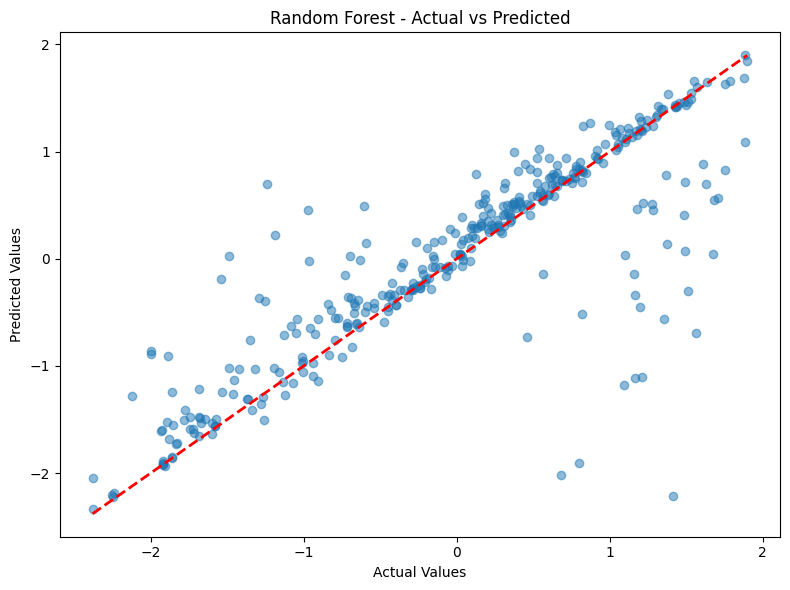


Results for Decision Tree:
RMSE: 0.7546
MAE: 0.3611
R² Score: 0.4838


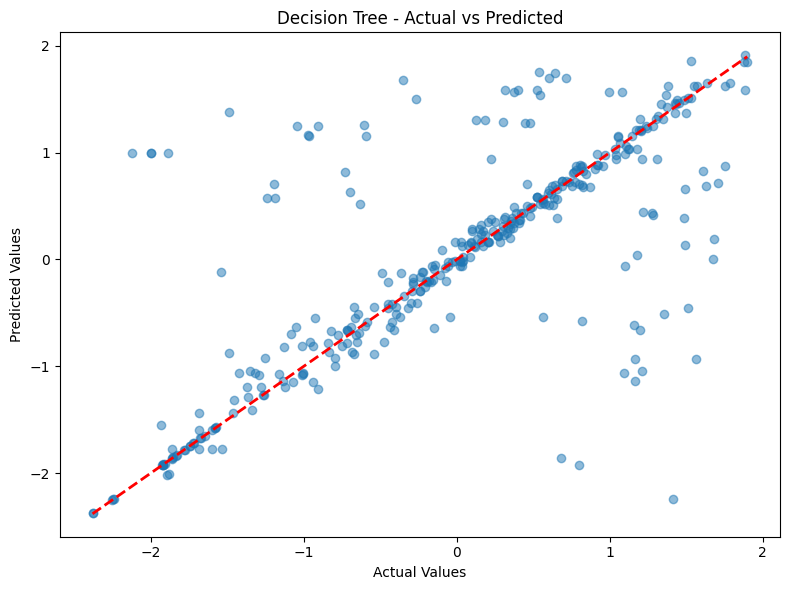


Results for KNN:
RMSE: 0.5768
MAE: 0.3715
R² Score: 0.6984


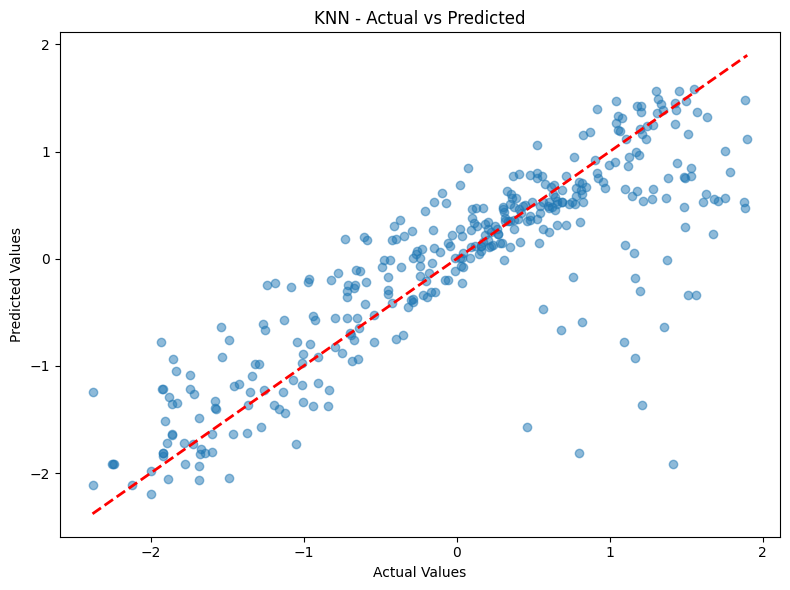


Results for Linear Regression:
RMSE: 0.5692
MAE: 0.3391
R² Score: 0.7063


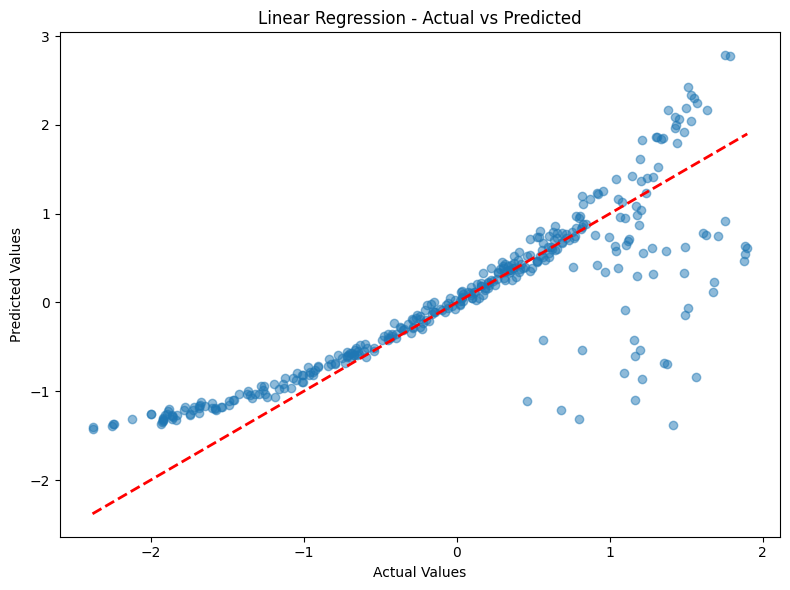

In [25]:
cv_results = {}
for name, model in models.items():
    cv_results[name] = evaluate_model_detailed(model, X_train, X_test, y_train, y_test, name)


Pada tahap ini dilakukan pelatihan dan menampilkan evaluasi hasil pelatihan dari beberapa model.Output yang ditampilkan untuk evaluasi yakni berupa grafik aktual dan predicte dimana Grafik ini menunjukkan hubungan antara nilai aktual (data asli) dan nilai prediksi yang dihasilkan oleh model. Jika model bekerja dengan sempurna, semua titik seharusnya berada tepat di garis merah putus-putus



## *HASIL MODEL RANDOM FOREST*
1. sebagian besar titik berada di sekitar garis merah,artinya model cukup akurat dalam memprediksi
2. nilai RMSE sebesar 0.5675 menunjukkan kesalahan rata-rata model dalam memprediksi cukup rendah
3. nilai MAE sebesar 0.2912 artinya prediksi model menyimpang 0.2912 satuan dari nilai sebernarnya
4. nilai R2 SCORE sebesar 0.7081 artinya model dapat menjelaskan 70.81% variabilitas data namun masih ada sekitar 29.19% variasi data yang tidak bisa dijelaskan oleh model.

## *HASIL MODEL DECISION TREE*

1. banyak titik tersebar cukup jauh dari garis merah yang artinya model cukup tinggi salah memprediksi, Selain itu juga terdapat bebera outlier yang menunjukkan model kurang mampu menangkap pola data
2. nilai RMSE sebesar 0.7546 menunjukkan kesalahan rata-rata model dalam memprediksi tinggi dibandingkan dengan model random forest sebelumnya
3. nilai MAE sebesar 0.3611 artinya prediksi model menyimpang  0.3611 satuan dari nilai sebernarnya, dan nilai ini lebih tinggi dibandingkan dengan model random forest sebelumnya
4. nilai R2 SCORE sebesar 0.4838 artinya model hanya bisa menjelaskan 48.38% variabilitas data ,nilai ini lebih rendah dibandingkan random forest sebelumnya


## *HASIL MODEL KNN*

1.  titik-titik data cukup mengikuti garis merah , tetapi masih ada beberapa titik yang menyimpang, terutama di area nilai ekstrem.
2. nilai RMSE sebesar  0.5768 menunjukkan tingkat kesalahan yang sedikit lebih tinggi dibandingkan dengan Random Forest (0.5675) tetapi masih lebih rendah dibandingkan Decision Tree (0.7546).
3. nilai MAE sebesar  0.3715 artinya menunjukkan bahwa model KNN memiliki kesalahan sedikit lebih besar dibandingkan Random Forest (0.2912) dan  Decision Tree (0.3611).
4. nilai R2 SCORE sebesar 0.6984 artinya model hanya bisa menjelaskan  69.84% variabilitas data ,nilai ini tidak jauh berbeda dengan Random Forest (70.81%) dan jauh lebih baik dibandingkan Decision Tree (48.38%)

## *HASIL MODEL LINIER REGRESSION*

1.  Pola titik-titik menunjukkan bahwa prediksi model cukup mengikuti garis merah. Terlihat bahwa model cenderung kurang akurat untuk nilai ekstrem
2. nilai RMSE sebesar  0.5692 menunjukkan tingkat kesalahan yang sedikit lebih lebih rendah dibandingkan KNN (0.5768) tetapi masih lebih tinggi dibandingkan Random Forest (0.5675).
3. nilai MAE sebesar  0.3391  artinya menunjukkan bahwa model KNN memiliki kesalahan lebih baik dibandingkan KNN (0.3715) dan Decision Tree (0.3611) tetapi memiliki kesalahan lebih tinggi dibandingkan Random Forest (0.2912)
4. nilai R2 SCORE sebesar  0.7063 artinya model hanya bisa menjelaskan 70.63% variabilitas data ,nilai ini lebih baik dibandingkan KNN (0.6984) dan Decision Tree (0.4838) tetapi sedikit di bawah Random Forest (0.7081).

## VISUALISASI PERBANDINGAN MODEL BERDASARKAN SKOR R-SQUARE



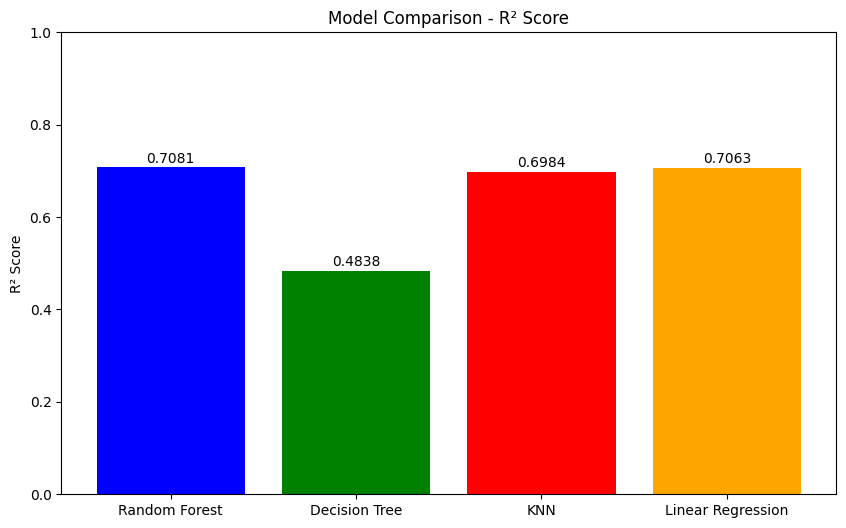

In [26]:

plt.figure(figsize=(10, 6))
plt.bar(cv_results.keys(), cv_results.values(), color=['blue', 'green', 'red', 'orange'])
plt.title('Model Comparison - R² Score')
plt.ylabel('R² Score')
plt.ylim(0, 1)
for i, v in enumerate(cv_results.values()):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.show()

Berdasarkan output yang dihasilkan didaptkan bahwa model random forest memiliki nilai rsquare tertinggi yakni sebesar 0.7081 sedangkan nilai terendah dimiliki oleh model decision tree dengan nilai sebesar 0.4838

## MENAMPILKAN FEATURE IMPORTANCE

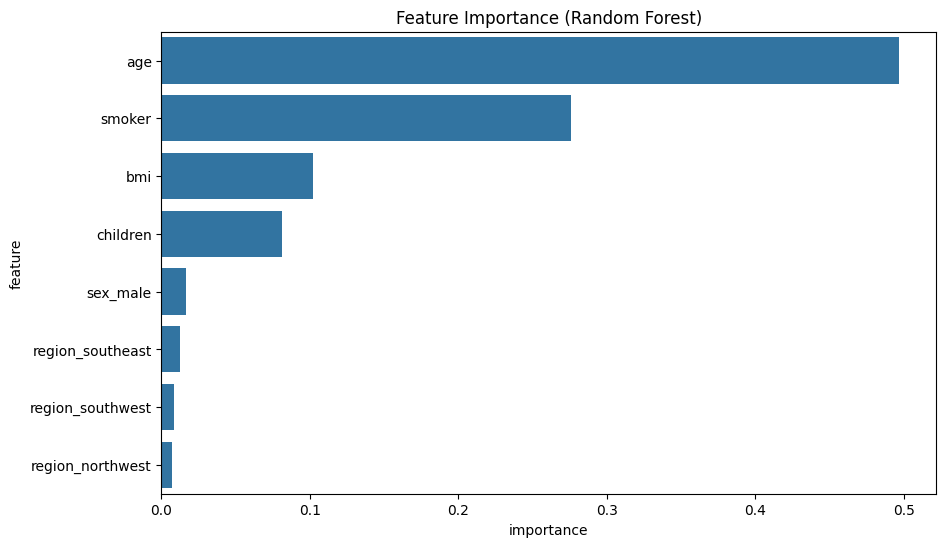


Best Model: Random Forest
Best R² Score: 0.7081


In [27]:
best_model_name = max(cv_results, key=cv_results.get)
best_model = models[best_model_name]

if isinstance(best_model, RandomForestRegressor):
    best_model.fit(X_train, y_train) 
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': best_model.feature_importances_
    })
    feature_importance = feature_importance.sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='importance', y='feature')
    plt.title(f'Feature Importance ({best_model_name})')
    plt.show()

print(f"\nBest Model: {best_model_name}")
print(f"Best R² Score: {cv_results[best_model_name]:.4f}")

Setelah dibandingkan dengan beberapa model didapatan bahwa model random forest adalah model terbaik dengan nilai 0.7081. 

Pada tahap ini saya menampilkan variabel atau fitur seberapa penting dalam mempengaruhi prediksi berdasarkan model random forest. Fitur-fitur yang memiliki pengaruh besar terhadap prediksi akan memiliki nilai importance yang tinggi, berdasarkan output didapatkan bahwa :
1. age memiliki nilai 0.5 yang artinya fitur age merupakan fitur dominan untuk memprediksi. Karena semakin tua seseorang, semakin tinggi risiko kesehatannya.
2. smoker memiliki nilai 0.3 yang artinya fitur smoker memiliki pengaruh terbesar kedua setelah age. Karena  perokok memiliki premi lebih mahal karena risiko kesehatan yang lebih tinggi
3. bmi memiliki nilai 0.1 fitur ini memiliki pengaruh terbesar ketiga. Semakin tinggi BMI, semakin besar kemungkinan seseorang mengalami masalah kesehatan seperti obesitas, yang dapat meningkatkan biaya asuransi
4. children juga memiliki pengaruh walau tidak sebesar dengan fitur age, smoker dan bmi
5. sex dan region memiliki pengaruh kecil dibandingkan fitur lainnya